In [115]:
# Problem set #3  due  May 16 2019
# word embeddings
import pickle
# to load from saved pickle:
# pkl_file = open("/tmp/p2_df_1k.20190411_180722.pkl", 'rb')
# df = pickle.load(pkl_file)
import numpy as np
import csv
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
from txt_utils import *

from string import punctuation
translator = str.maketrans(' ', ' ', punctuation)
from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')


In [116]:
working_dir = "/home/xhta/Robot/problemsets/prob3/"
mdfname = "/home/xhta/Robot/problemsets/prob3/case_metadata.csv"  # metadata
fpath = '/home/xhta/Robot/cases/'       # !!!!!! this path must be modified to point to the folder where the cases are located (texts)

In [117]:
def normalize_text(doc):         # taken from past problem set     see comment under question 3
    tokens = []
    for sent in doc.sents:
        sent = str(sent)
        sent = sent.replace('\r', ' ').replace('\n', ' ')
        lower = sent.lower()
        nopunc = lower.translate(translator)
        words = nopunc.split()
        nostop = [w for w in words if w not in stoplist]
        no_numbers = [w if not w.isdigit() else '#' for w in nostop]
        stemmed = [stemmer.stem(w) for w in no_numbers]
        tokens += stemmed
    return tokens


In [118]:
random.seed(1234)
sample_size = 1000  # limit the size of cases used. The entire corpus of 5700+ cases would take many hours to process. 

In [119]:
from datetime import datetime
from datetime import timedelta

td = timedelta (days = 0, hours =  2, minutes = 16)
Anfang = datetime.now()
Start = Anfang + td

In [120]:
df = pd.DataFrame(index = range(0,0), columns=['jahr',  'rev', 'judge', 'jid', 'logcites', \
                                               'nsents', 'nwords', 'nnouns', 'nverbs', 'nadjes', \
                                               'cs', 'party', 'adjs'], dtype = int)     # 
df['judge'] = df['judge'].astype('object')       #   
df['logcites'] = df['logcites'].astype('float64')        #
df['adjs'] = df['adjs'].astype('object')    
df['cs'] = df['cs'].astype('float64') 
for col in ['jahr',  'rev', 'jid', 'nsents', 'nwords', 'nnouns', 'nverbs', 'nadjes', 'party']:
    df[col] = df[col].astype('int')

In [121]:
print ((datetime.now()+td).strftime("%Y%m%d %H:%M:%S") + "  Start reading in metadata from case_metadata.csv")
#caseid,case_reversed,judge_id,year,x_republican,log_cites
with open (mdfname) as fcrev:
    readCSV = csv.reader(fcrev, delimiter = ',')
    next(readCSV, None)   # skip 1 line, which is the header
    for Zei in readCSV:
        if Zei[4] == '1.0':
            df.loc[Zei[0]] = [int(float(Zei[3])), Zei[1], ' ', int(float(Zei[2])), Zei[5], 0, 0, 0, 0, 0, 0, 1, [ ]]
        elif Zei[4] == '0.0':
            df.loc[Zei[0]] = [int(float(Zei[3])), Zei[1], ' ', int(float(Zei[2])), Zei[5], 0, 0, 0, 0, 0, 0, 0, [ ]]
 
df['rev'] = df['rev'].astype('int')      #  
print ((datetime.now()+td).strftime("%Y%m%d %H:%M:%S") + "  done reading in metadata")


20190516 09:43:48  Start reading in metadata from case_metadata.csv
20190516 09:44:43  done reading in metadata


In [122]:
df.head()

,jahr,rev,judge,jid,logcites,nsents,nwords,nnouns,nverbs,nadjes,cs,party,adjs
X3JGGO,1925,0,,1653,1.0986122886681098,0,0,0,0,0,0.0,1,[]
X3OH3J,1924,0,,1034,1.6094379124341003,0,0,0,0,0,0.0,0,[]
X3U0KO,1925,0,,2303,1.791759469228055,0,0,0,0,0,0.0,0,[]
X53HAD,1924,0,,1764,,0,0,0,0,0,0.0,0,[]
X9VC5V,1925,0,,493,,0,0,0,0,0,0.0,1,[]


In [123]:
df.dtypes

jahr          int64
rev           int64
judge        object
jid           int64
logcites     object
nsents        int64
nwords        int64
nnouns        int64
nverbs        int64
nadjes        int64
cs          float64
party         int64
adjs         object
dtype: object

In [124]:
len(df)  # cases where the pary affiliation is unknown are excluded

4867

In [126]:
from os import listdir
from os.path import isfile, join

fpath = '/home/xhta/Robot/cases/'       # !!!!!! this path must be modified to point to the folder where the cases are located (texts)
fnames = [f for f in listdir(fpath) if isfile(f)]

ldir = listdir(fpath)

import spacy    #  initializing data structures used later
from spacy.lang.en import English
nlp = English()
nlp.add_pipe(nlp.create_pipe('sentencizer'))

nlp2 = spacy.load('en_core_web_sm')

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [135]:
df2 = df.sample(sample_size, random_state=1234)
df2.head()
# df = all cases except those where the party affiliation of the judge is missing
# df2 = a sample of df  df has 4867 records, df2 has 1000, word embeddings are done using df2

,jahr,rev,judge,jid,logcites,nsents,nwords,nnouns,nverbs,nadjes,cs,party,adjs
X32I8D,1990,0,,2162,1.3862943611198906,0,0,0,0,0,0.0,1,[]
X47N90,1940,0,,364,1.9459101490553132,0,0,0,0,0,0.0,0,[]
X3S5S6,1932,0,,1951,2.772588722239781,0,0,0,0,0,0.0,1,[]
X4NT21,1995,1,,1723,1.3862943611198906,0,0,0,0,0,0.0,0,[]
X49HMG,1972,0,,2112,0.6931471805599453,0,0,0,0,0,0.0,1,[]


In [131]:
def preprocess (lsentences):  # get rid of tokens that are pure numbers or are on stoplist
    lret = []
    for sent in lsentences:
        lret.append([w for w in sent if w not in stoplist if w.isdigit() == False])
    return lret

In [110]:
sent1 = get_sentences('I went home, after work  123.') 
print (sent1)

[['went', 'home', 'work', '123']]


In [97]:
print(preprocess(sent1))  # sample

[['went', 'home', 'work']]


In [98]:
sentences = get_sentences('David Dicus testified that Johnny McEwan said "that if the union did come in, that our fishing trips would be \
gone. We would never have any more, and that is about as good as I can remember on the conversation then."')
print(sentences)
print(preprocess(sentences))

[['david', 'dicus', 'testifi', 'johnni', 'mcewan', 'said', 'union', 'come', 'fish', 'trip', 'would', 'gone'], ['would', 'never', 'good', 'rememb']]
[['david', 'dicus', 'testifi', 'johnni', 'mcewan', 'said', 'union', 'come', 'fish', 'trip', 'would', 'gone'], ['would', 'never', 'good', 'rememb']]


In [140]:
sentencesr = []
sentencesd = []
i = 0
for fname in ldir:      # read in the document samples and populate the dataframe
    lae = len(fname)
    cname = fname[5:(lae-4)]
    year = fname[0:4]
    if (not (cname in df2.index)): continue
    if ( i% 29 ==0):
        je = datetime.now() + td
        fje = je.strftime('%Y%m%d_%H%M%S')
        pkl_fname = os.path.join(working_dir, '_' + str(sample_size) + '-' + fje + '.pkl')
        #df2.to_pickle(pkl_fname, protocol = -1)
        print(fje + " i:  " + str(i)) # serves as a "progress bar" when reading in a large no of docs
    i = i + 1
    fna2 = join(fpath, year + '_' + cname + '.txt')
    rawtext = open(fna2).read()
    doc = nlp(rawtext)
                                
    df2.at[cname, 'doc'] =  rawtext
    df2.at[cname, 'leng'] =  len(rawtext)

    sentences = [sent.string.strip() for sent in doc.sents]
    df2.at[cname, 'nsents'] =  len(sentences)
    df2.at[cname, 'nwords'] = len([token for token in doc if not token.is_punct])
    
    doc2 = nlp2(rawtext)
    df2.at[cname, 'nnouns'] = len([w for w in list(doc2) if w.tag_.startswith('N')])     # PTB convention
    df2.at[cname, 'nverbs'] = len([w for w in list(doc2) if w.tag_.startswith('V')])
    
    al = [w for w in list(doc2) if w.tag_.startswith('J')]
    df2.at[cname, 'adjs'] = list(set(al))
 
    rawsents = get_sentences(rawtext)
    lsents = [ sent for sent in rawsents if len(sent) > 2 ]
    if df2.loc[cname, 'party'] == 1:
        sentencesr += preprocess(lsents)   # sentencesr are from the cases where judge = repub
    elif df2.loc[cname, 'party'] == 0:
        sentencesd += preprocess(lsents)  # sentencesr are from the cases where judge = democr
                                
    df2.at[cname, 'nadjes'] = len( df2.at[cname, 'adjs'])
    #cltoks = normalize_text(doc2)
    #ntoks = [str(token).lower() for token in list(doc2) if (token.tag_.startswith('N')) & (not token.is_punct) & (not token.is_space) & (not token.is_stop) & (str(token) in cltoks)]
    
    # get vaader sentiment score ('cs') to be used further down when doing 2 stage least square
    # serves as a causal variable of interest that is affected by the instrument variable 'party affiliation'
    # using sentiment score as a casual variable is here a matter of convenience
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(rawtext)
    df2.at[cname, 'cs'] = ss['compound']
    # the IV 'party' is correlated with the causal variable 'cs' (vader sentiment score)
    # the IV can only affect the outcome (logcites or reversal) through the cs which acts
    # as a textual feature


20190516_095132 i:  0
20190516_095244 i:  29
20190516_095439 i:  58
20190516_095545 i:  87
20190516_095637 i:  116
20190516_095740 i:  145
20190516_095917 i:  174
20190516_100110 i:  203
20190516_100208 i:  232
20190516_100321 i:  261
20190516_100409 i:  290
20190516_100612 i:  319
20190516_100740 i:  348
20190516_100909 i:  377
20190516_101021 i:  406
20190516_101241 i:  435
20190516_101358 i:  464
20190516_101520 i:  493
20190516_101745 i:  522
20190516_101843 i:  551
20190516_102010 i:  580
20190516_102110 i:  609
20190516_102440 i:  638
20190516_102623 i:  667
20190516_102731 i:  696
20190516_102833 i:  725
20190516_102933 i:  754
20190516_103029 i:  783
20190516_103200 i:  812
20190516_103353 i:  841
20190516_103613 i:  870
20190516_103714 i:  899
20190516_103805 i:  928
20190516_103908 i:  957
20190516_104013 i:  986


In [142]:
df2.head()

,jahr,rev,judge,jid,logcites,nsents,nwords,nnouns,nverbs,nadjes,cs,party,adjs,doc,leng
X32I8D,1990,0,,2162,1.3862943611198906,371,7784,2504,1077,387,0.9996,1,"[absolute, pursuant, civil, material, only, su...","WALLACE , Circuit Judge: Yakima County appeal...",45073.0
X47N90,1940,0,,364,1.9459101490553132,97,1995,612,282,131,0.9986,0,"[proper, usual, concerted, unpatented, further...","CLARK , Circuit Judge.\nThis is a petition by...",11401.0
X3S5S6,1932,0,,1951,2.772588722239781,218,6196,1850,863,249,0.9995,1,"[additional, Feather, same, internal, severe, ...","SOPER , Circuit Judge.\nBankers' Pocahontas C...",34110.0
X4NT21,1995,1,,1723,1.3862943611198906,366,8013,2526,1148,589,0.9998,0,"[civil, asserted, narrow, periodic, comprehens...","REINHARDT , Circuit Judge: This case involves...",48534.0
X49HMG,1972,0,,2112,0.6931471805599453,54,1711,507,231,76,-0.9558,1,"[criminal, criminal, oral, such, criminal, par...","TUTTLE , Circuit Judge: The United States app...",9831.0


In [257]:
df2.loc['X49HMG', 'adjs']

[criminal,
 criminal,
 oral,
 such,
 criminal,
 particular,
 determinative,
 criminal,
 collateral,
 prior,
 negligent,
 small,
 necessary,
 foreign,
 former,
 knowing,
 careful,
 fraudulent,
 criminal,
 criminal,
 criminal,
 criminal,
 separate,
 reasonable,
 reasonable,
 criminal,
 certain,
 punitive,
 previous,
 constitute,
 appropriate,
 only,
 remedial,
 plain,
 5th,
 same,
 few,
 possible,
 such,
 clear,
 same,
 innocent,
 subject,
 punitive,
 earlier,
 punitive,
 clandestine,
 identical,
 same,
 criminal,
 same,
 clear,
 willful,
 guilty,
 such,
 necessary,
 entire,
 more,
 Honorable,
 domestic,
 different,
 willful,
 essential,
 earlier,
 intent,
 same,
 same,
 above,
 less,
 same,
 necessary,
 subject,
 simple,
 acquittal,
 criminal,
 prior]

In [ ]:
# question one : train 2 Word2Vec embeddings on the cases corpus using gensim 
# setting the window length to 2 and to 10 , dimension of vectors is set to 150

In [ ]:
# fill a column with the adjectives because later in question 2, one is asked to find
# the nearest neighbors of some adjectives in the word embeddings

In [144]:
sentences = sentencesr + sentencesd

In [145]:
len(sentencesr)  , len(sentencesd), len(sentences)

(69634, 74871, 144505)

In [146]:
import gensim
from gensim.models import KeyedVectors
mymodel2 = gensim.models.Word2Vec(sentences, size = 300, window = 2, min_count = 10, workers = 4, sample = 1e-3)
mymodel10 = gensim.models.Word2Vec(sentences, size = 300, window = 10, min_count = 10, workers = 4, sample = 1e-3)


In [ ]:
# the following shows the effect of window size. 
# A larger window size would make more words available to become "similar" / "related" to 
# the word in focus. Hence a larger window size would capture a broader sense of relatedness, 
# i.e. topical relatedness (big picture) while a small window
# size would capture local similarity (word to word). For texts that are made up of long sentenes,
# of which legal texts are a candidate, choosing a long window might be more appropriate.
# Shorter window length might be more appropriate for short sentences (e.g. SMS, tweets)

In [147]:
mymodel2.wv.most_similar('woman')  # window size 2


[('pregnant', 0.8464378118515015),
 ('shoulder', 0.8347693085670471),
 ('flee', 0.8277795314788818),
 ('ride', 0.8176820874214172),
 ('leg', 0.8118417263031006),
 ('wound', 0.8108552098274231),
 ('fighter', 0.809969425201416),
 ('resign', 0.8094642162322998),
 ('preschool', 0.8091839551925659),
 ('enlist', 0.8064537048339844)]

In [148]:
mymodel10.wv.most_similar('woman')    # window size 10

[('girl', 0.8440597057342529),
 ('leader', 0.8268359899520874),
 ('front', 0.8213064670562744),
 ('locker', 0.8201465606689453),
 ('enlist', 0.8198788166046143),
 ('chapel', 0.8194998502731323),
 ('matron', 0.8184630870819092),
 ('wore', 0.8166310787200928),
 ('holiday', 0.8158475756645203),
 ('negro', 0.8056079149246216)]

In [149]:
mymodel2.wv.most_similar('man')    # window size 2

[('bacteria', 0.8052197694778442),
 ('kill', 0.7887599468231201),
 ('flee', 0.7730388641357422),
 ('gun', 0.7705869078636169),
 ('hit', 0.7685096263885498),
 ('detect', 0.7676072120666504),
 ('babi', 0.7663434147834778),
 ('suspect', 0.7652333378791809),
 ('explos', 0.7633503079414368),
 ('garment', 0.7597878575325012)]

In [150]:
mymodel10.wv.most_similar('man')   # window size 10

[('gun', 0.8846523761749268),
 ('room', 0.8698497414588928),
 ('saw', 0.8650979399681091),
 ('drive', 0.8642926812171936),
 ('hit', 0.8587425947189331),
 ('break', 0.8579410314559937),
 ('apart', 0.8521554470062256),
 ('scene', 0.8489221930503845),
 ('away', 0.848011314868927),
 ('door', 0.8459398746490479)]

In [ ]:
import pickle
df2.to_pickle("p3_df2_1000_20190516_0647.pkl", compression="gzip", protocol=-1)

In [151]:
X2 = mymodel2[mymodel2.wv.vocab]
X10 = mymodel10[mymodel10.wv.vocab]
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


/home/xhta/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/home/xhta/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
# pick a sample of 100 words and visualize them in a 2 dimensional coordinate, after running the
# high dimensional word vectors through a PCA  , extracting 2 principal components

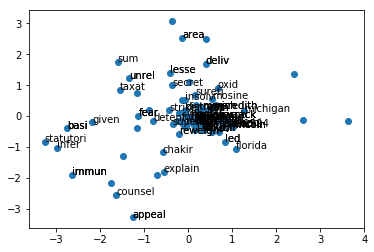

In [152]:
pca2 = PCA(n_components=2)              # window size 2
result2 = pca2.fit_transform(X2)
plt.scatter(result2[0:100,0], result2[0:100,1])
words2 = list(mymodel2.wv.vocab)
for i in range(100):
    #isampl = random.sample(range(len(words2)), 1)
    isampl = random.sample(range(100), 1)
    plt.annotate(words2[isampl[0]], xy=(result2[isampl[0], 0], result2[isampl[0], 1]))

#for i, word in enumerate(words[0:50]):
#    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

# the plots without any tweaking look as follows   larger window size seems lead to larger clusters

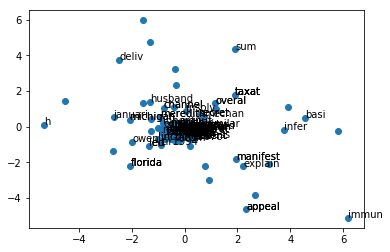

In [154]:
pca10 = PCA(n_components=2)             # window size 10
result10 = pca10.fit_transform(X10)
plt.scatter(result10[0:100,0], result10[0:100,1])
words10 = list(mymodel10.wv.vocab)
for i in range(100):
    #isampl = random.sample(range(len(words2)), 1)
    isampl = random.sample(range(100), 1)
    plt.annotate(words10[isampl[0]], xy=(result10[isampl[0], 0], result10[isampl[0], 1]))

#for i, word in enumerate(words[0:50]):
#    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

In [158]:
with open("/home/xhta/Robot/problemsets/prob3/sentencesr_20190516_1051.pkl", "wb") as fcr:
    pickle.dump(sentencesr, fcr)

In [161]:
with open("/home/xhta/Robot/problemsets/prob3/sentencesd_20190516_1054.pkl", "wb") as fcd:
    pickle.dump(sentencesd, fcd)

In [ ]:
with open("/home/xhta/Robot/problemsets/prob3/p3_df2_1000_20190516_1055.pkl", "wb") as fcdf2:
    pickle.dump(df2, fcdf2)

In [ ]:
df2.to_pickle("/home/xhta/Robot/problemsets/prob3/p3_df_full.20190516_1056.pl", compression="gzip", protocol=4)

In [ ]:
pickle.dump(dfs, open("/home/xhta/Robot/problemsets/prob3/p3_df_full.20190515_084105.pkl", "wb"))

In [ ]:
# Quesition two 
# train word embeddings separately for republican (list 'sentencesr') 
# and democratic (list 'sentencesd') judges 

In [164]:
mymodelr = gensim.models.Word2Vec(sentencesr, size = 150, window = 6, min_count = 2)
mymodeld = gensim.models.Word2Vec(sentencesd, size = 150, window = 6, min_count = 2)

Xr = mymodelr[mymodelr.wv.vocab]
Xd = mymodeld[mymodeld.wv.vocab]


/home/xhta/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/home/xhta/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [165]:
mymodelr.wv.most_similar('money')   # model trained on texts of republican judges

[('expens', 0.9561559557914734),
 ('incur', 0.9524948596954346),
 ('sum', 0.9478408098220825),
 ('owe', 0.93878573179245),
 ('loss', 0.9325723052024841),
 ('debt', 0.9266415238380432),
 ('paid', 0.9265156388282776),
 ('payment', 0.9204854965209961),
 ('dividend', 0.9191948175430298),
 ('excess', 0.9111289381980896)]

In [166]:
mymodeld.wv.most_similar('money')   # model trained on texts of democratic judges

[('total', 0.9465599656105042),
 ('account', 0.9367753267288208),
 ('million', 0.9213858246803284),
 ('recaptur', 0.9169530868530273),
 ('expens', 0.9164575934410095),
 ('asset', 0.907965898513794),
 ('profit', 0.9038417935371399),
 ('gain', 0.9029420614242554),
 ('incur', 0.9025470614433289),
 ('cash', 0.901752233505249)]

In [167]:
mymodelr.wv.most_similar('labor')  # adjectives associated with democratic

[('railway', 0.8543978333473206),
 ('nation', 0.8511663675308228),
 ('8a', 0.8158342242240906),
 ('railroad', 0.8017300367355347),
 ('picket', 0.7764107584953308),
 ('unfair', 0.7633390426635742),
 ('relat', 0.7543395757675171),
 ('union', 0.7421663999557495),
 ('commerc', 0.7395340800285339),
 ('health', 0.7300494313240051)]

In [168]:
mymodeld.wv.most_similar('labor')  # adjectives associated with democratic

[('unfair', 0.8683746457099915),
 ('nuton', 0.8197751045227051),
 ('practic', 0.8134739995002747),
 ('nation', 0.8021470308303833),
 ('relat', 0.7899655699729919),
 ('woodwork', 0.7887427806854248),
 ('railway', 0.76778644323349),
 ('wagner', 0.7631082534790039),
 ('ila', 0.7424134016036987),
 ('8a', 0.7390286922454834)]

In [169]:
mymodelr.wv.most_similar('fair')  # adjectives associated with republican

[('balanc', 0.9087457060813904),
 ('treatment', 0.9050480127334595),
 ('mere', 0.8992576003074646),
 ('unabl', 0.8883326649665833),
 ('whatev', 0.886448085308075),
 ('racial', 0.8859272599220276),
 ('serious', 0.8841539025306702),
 ('alon', 0.8815022110939026),
 ('justifi', 0.8811771869659424),
 ('either', 0.8800297379493713)]

In [170]:
mymodeld.wv.most_similar('fair')  # adjective associated with democratic

[('possibl', 0.8671642541885376),
 ('need', 0.8501968383789062),
 ('essenti', 0.8444393277168274),
 ('dilig', 0.8433529734611511),
 ('enough', 0.8425250053405762),
 ('impact', 0.8408751487731934),
 ('kind', 0.8376089930534363),
 ('necessari', 0.8362948894500732),
 ('necess', 0.8348177075386047),
 ('beyond', 0.8346182107925415)]

In [171]:
mymodelr.wv.most_similar('social')   # adjective associated with republican

[('wellb', 0.9505077600479126),
 ('sewag', 0.9436139464378357),
 ('misde', 0.9397480487823486),
 ('fring', 0.9306802749633789),
 ('obligor', 0.9220919609069824),
 ('children', 0.9214077591896057),
 ('destroy', 0.92124342918396),
 ('mpp', 0.9209011793136597),
 ('shield', 0.9196289777755737),
 ('andor', 0.9189792275428772)]

In [172]:
mymodeld.wv.most_similar('social')   # adjective associated with democratic

[('secur', 0.8898752927780151),
 ('self', 0.8827425837516785),
 ('affair', 0.8737537860870361),
 ('reform', 0.8693045377731323),
 ('emerg', 0.867165744304657),
 ('war', 0.8588572144508362),
 ('veteran', 0.8582143187522888),
 ('religion', 0.8570960164070129),
 ('8c1', 0.8503335118293762),
 ('guard', 0.8462868928909302)]

In [181]:
mymodelr.wv.most_similar('conserv')   # adjective associated with republican

[('executrix', 0.9692068696022034),
 ('quitclaim', 0.9625234007835388),
 ('motorship', 0.9597534537315369),
 ('laden', 0.957137942314148),
 ('del', 0.9568247199058533),
 ('devise', 0.9561384320259094),
 ('via', 0.9558252692222595),
 ('mcmanus', 0.955203115940094),
 ('overdu', 0.9548380374908447),
 ('wabasha', 0.9546806812286377)]

In [176]:
from gensim.models import FastText
fasttext_r = FastText(sentencesr, size=300, window = 6, min_count= 10)
fasttext_d = FastText(sentencesd, size=300, window = 6, min_count= 10)

In [179]:
fasttext_r.wv.most_similar('lawful')   # adjective associated with republican

[('flaw', 0.913240373134613),
 ('law', 0.8868433237075806),
 ('governor', 0.8852859735488892),
 ('commonlaw', 0.8805171251296997),
 ('lawrenc', 0.8642091751098633),
 ('govern', 0.8635423183441162),
 ('uaw', 0.8570410013198853),
 ('antitrust', 0.8539235591888428),
 ('broader', 0.8354189991950989),
 ('amici', 0.8275891542434692)]

In [178]:
fasttext_d.wv.most_similar('liberal')  # adjective associated with democratic

[('immun', 0.7519466876983643),
 ('sovereign', 0.6911687850952148),
 ('imbal', 0.6730690002441406),
 ('free', 0.670250654220581),
 ('privat', 0.6697605848312378),
 ('privaci', 0.6638749837875366),
 ('freez', 0.6518279314041138),
 ('amici', 0.6507158875465393),
 ('scope', 0.6502439975738525),
 ('civil', 0.6472489833831787)]

In [259]:
fasttext_d.wv.most_similar('free')   # adjective associated with democratic

[('freez', 0.9751982092857361),
 ('freedom', 0.959705114364624),
 ('freeli', 0.9287161827087402),
 ('speech', 0.8962064981460571),
 ('freedman', 0.882703423500061),
 ('fresh', 0.8487541675567627),
 ('protect', 0.8313462138175964),
 ('speed', 0.785627007484436),
 ('french', 0.7776853442192078),
 ('choos', 0.7726914882659912)]

In [260]:
fasttext_d.wv.most_similar('child')  # adjective associated with democratic

[('children', 0.9575172662734985),
 ('chill', 0.9087114334106445),
 ('video', 0.8326703310012817),
 ('garag', 0.8227871060371399),
 ('area', 0.8202450275421143),
 ('space', 0.815049409866333),
 ('curb', 0.7982078194618225),
 ('crash', 0.7956299185752869),
 ('drag', 0.7929015755653381),
 ('travel', 0.7861450910568237)]

In [261]:
fasttext_d.wv.most_similar('welfare')   # concept associated with democratic

[('welfar', 0.8936223983764648),
 ('energi', 0.8900074362754822),
 ('socal', 0.8750736713409424),
 ('ffa', 0.8721441030502319),
 ('canadian', 0.8263280987739563),
 ('util', 0.8202387690544128),
 ('navi', 0.8169599771499634),
 ('scream', 0.8106225728988647),
 ('locat', 0.808144211769104),
 ('sys', 0.803824782371521)]

In [ ]:
#Question 3 : arranged with Dr Labzina to perform 2 stage least square for this part of the HW
# terminology follows the following source:
# https://bashtage.github.io/linearmodels/doc/iv/examples/basic-examples.html

In [185]:
from linearmodels.iv import IV2SLS

In [184]:
df2['_const'] = 1

In [248]:
df2.columns

Index(['jahr', 'rev', 'judge', 'jid', 'logcites', 'nsents', 'nwords', 'nnouns',
       'nverbs', 'nadjes', 'cs', 'party', 'adjs', 'doc', 'leng', '_const'],
      dtype='object')

In [190]:
df2['leng'] = df2['leng'].astype(int)

In [ ]:
df3 = df2[ df2['logcites'] != '']  # get rid of the cases with missing logcites, could also have set to 0
# df3 = df2 minus the cases where the logcites is missing  df3 has 879 records, df2 has 1000
# the 2 stage SLS is performed using df3

In [ ]:
df3['logcites'] = df3['logcites'].astype(float)

In [ ]:
for col in ['nwords', 'doc', 'adjs']:
    df3 = df3.drop(col, axis = 1)

In [249]:
df3.dtypes

jahr          int64
rev           int64
jid           int64
logcites    float64
nsents        int64
nnouns        int64
nverbs        int64
nadjes        int64
cs          float64
party         int64
leng          int64
_const        int64
dtype: object

In [250]:
len(df3)

879

In [ ]:
# according to the linearmodels docu, OLS can also be done using IV2SLS, setting endog and instruments to None

In [ ]:
# how to call IV2SLS:
# mod = IV2SLS(dependent, exog, endog, instruments)
# in my case dependent = either logcites or rev , I use logcites
# exog = _const, leng = length of text, nverbs, jahr : year of the case, cs = vader sentiment score
#   the terminology is not directly convincing, since one would think these variables are endog
# endog is here 
# the instrument is here the party affiliation of the judge

In [242]:
res_ols = IV2SLS(dependent=df3['logcites'], exog=df3[['_const', 'leng', 'nverbs', 'jahr', 'cs']], endog=None, instruments=None).fit(cov_type='clustered', clusters=df3['jahr'])
print(res_ols)
# ols estimation summary shows high F-statistics (101.75) and significant correlation between outcome and
# casual variable (cs) ( > 2)

                            OLS Estimation Summary                            
Dep. Variable:               logcites   R-squared:                      0.1789
Estimator:                        OLS   Adj. R-squared:                 0.1751
No. Observations:                 879   F-statistic:                    101.75
Date:                Thu, May 16 2019   P-value (F-stat)                0.0000
Time:                        09:37:01   Distribution:                  chi2(4)
Cov. Estimator:             clustered                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
_const        -10.654     3.2793    -3.2489     0.0012     -17.081     -4.2266
leng       -3.861e-06  1.372e-05    -0.2814     0.77

In [234]:
res_1st = IV2SLS(dependent=df3['cs'], exog=df3[['_const', 'leng', 'nverbs', 'jahr', 'party']], \
                 endog=None, instruments=None).fit(cov_type='clustered', clusters=df3['jahr'])
print(res_1st)
# the first stage indicates with f-statistic = 105.54 easily passes through the rule of thumb test
# however the relationship between the IV (cs) and the casual variable (compound sentiment) is not significant at the 5% level

                            OLS Estimation Summary                            
Dep. Variable:                     cs   R-squared:                      0.0841
Estimator:                        OLS   Adj. R-squared:                 0.0799
No. Observations:                 879   F-statistic:                    105.54
Date:                Thu, May 16 2019   P-value (F-stat)                0.0000
Time:                        09:33:56   Distribution:                  chi2(4)
Cov. Estimator:             clustered                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
_const         19.551     2.8396     6.8851     0.0000      13.985      25.116
leng        9.313e-05  1.152e-05     8.0819     0.00

In [239]:
res_2nd = IV2SLS(dependent=df3['logcites'], exog=df3[['_const', 'leng', 'nverbs', 'jahr']], endog = df3[['cs']], instruments=df3['party']
).fit(cov_type='clustered', clusters=df3['jahr'])
print(res_2nd)
# the second stage with F-statistics =38 stil shows the relevance of 2SLS 

                          IV-2SLS Estimation Summary                          
Dep. Variable:               logcites   R-squared:                     -1.5489
Estimator:                    IV-2SLS   Adj. R-squared:                -1.5605
No. Observations:                 879   F-statistic:                    38.498
Date:                Thu, May 16 2019   P-value (F-stat)                0.0000
Time:                        09:35:25   Distribution:                  chi2(4)
Cov. Estimator:             clustered                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
_const         15.586     37.274     0.4181     0.6758     -57.469      88.641
leng           0.0001     0.0002     0.6830     0.49

In [247]:
# the hausman statistics doesn't support exogenuity 
res_2nd.wu_hausman()

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 1.5059
P-value: 0.2201
Distributed: F(1,873)
WaldTestStatistic, id: 0x7f9311e3b7b8